<a href="https://colab.research.google.com/github/aaperei/data-science/blob/main/mlp_red_wine_quality_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação utilizando Rede Neural MLP -  Qualidade Vinho Tinto Português

### Alison Augusto Miranda Pereira - UNIFESP - 2021

## Descrição do problema
O presente trabalho tem o objetivo de explorar o algoritmo de classificaçao da rede MPL, por meio dos dados de qualidade do vinho tinto português. A qualidade do vinho é um atributo influenciado por alguns parâmetros físicos, químicos e sensoriais. Além disso, a qualidade é definida por um número inteiro no intervalo de 0 a 10.

Para a realização da classificação, utilizou-se o algoritmo original da rede neural MLP - SGD.

Os dados utilizados neste experimento estão disponíveis no site Machine Learning Repository, através do endereço [https://archive.ics.uci.edu/ml/datasets/Wine+Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).

A seguir, vamos importar o arquivo csv refente à qualidade do vinho tinto.

In [9]:
# load wine red csv file

import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# import data from csv file
wine_dataframe = pd.read_csv('winequality-red.csv', sep=';')

wine_dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Preparação dos dados

A seguir, é feito um pequeno tratamento e separação dos dados inicias em três fases: 
- Treinamento - 80%
- Validação - 10%
- Teste - 10%

In [10]:
# Percentage used for training, validation and test
train_perc = 0.8
validation_perc=0.1
test_perc = 0.1

# -----------------------------------------------------------------------#
# Split initial original dataframe in two (input and output) and convert to list format
aux = wine_dataframe
output_dataframe = aux['quality'].to_frame()
input_dataframe = aux.drop(columns=['quality'])
output_list = output_dataframe.values.tolist()
input_list = input_dataframe.values.tolist()

# -----------------------------------------------------------------------#
# Split my data in three parts - Trainning, validation and Test
number_of_samples = len(aux)
index1 = int(train_perc * number_of_samples)
index2 = int((train_perc + validation_perc) * number_of_samples)

input_train = input_list[0:index1]
input_validation = input_list[index1+1:index2]
input_test = input_list[index2+1:]

output_train = output_list[0:index1]
output_validation = output_list[index1+1:index2]
output_test = output_list[index2+1:]


## Classificação utilizando MLP Classifier

Optou-se por utilizar a implementação do classificador MLP da biblioteca python `scikit-learn`. Detalhes podem ser encontrados na documentação oficial disponível em [https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

Iremos utilizar o algoritmo `SGD`, afim de testarmos o a interferência do parâmetro `momentum` no treinamento do modelo.

A seguir é demonstrado como é feito o processo de treinamento e predição da rede MPL.

In [11]:
from sklearn.neural_network import MLPClassifier

# Function to calculate the model accuracy
# Sklearn also offers a default method for the same purpose: MLPClassifier.score(x, y)
def calculate_accuracy(input, expected_output):
  predict = clf.predict(input)
  sample_size = len(predict)
  success = 0

  for i in range(sample_size):
    if(predict[i] == expected_output[i]):
      success = success + 1

  return success/sample_size

# -----------------------------------------------------------------------#
# Function to initilize the SGD MLP
def create_sgd_mlp(momentum=0.9, alpha=0.0001, hidden_layer_sizes=(5,2)):
  return MLPClassifier(solver='sgd', alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=1, momentum=momentum)
# -----------------------------------------------------------------------#
# Train the MLP Classifier
clf = create_sgd_mlp()
clf.fit(input_train, output_train)

# -----------------------------------------------------------------------#
# Validate the MLP Classifier trainning
accuracy_test_1 = calculate_accuracy(input_validation, output_validation)
print("Accuracy for validation dataset = ", accuracy_test_1*100)

Accuracy for validation dataset =  51.57232704402516


## Termo de momentum

O termo de momentum (informado durante a criação da minha rede neural MLP) é responsável por reduzir a incidência de instabilidade durante a fase de treinamento, por gerar uma inércia na descida do vetor gradiente. É um valor entre `0` e `1`, utilizado somente quando aplicamos o algoritmo SGD.

A seguinte, é demonstrado o treinamento da rede MLP para os seguintes valores de momentum: `0.1, 0.2, 0.3,  0.4, 0.5, 0.6, 0.7, 0.8, 0.9 e 1.0`. 

Pelos gráfico, é fácil notarmos a interferência do `momentum` na acuração do modelo gerado. Para os dados de teste, a maior acurácia foi verificado com `momentum=0.9` (valor padrão assumido pelo sklearn).

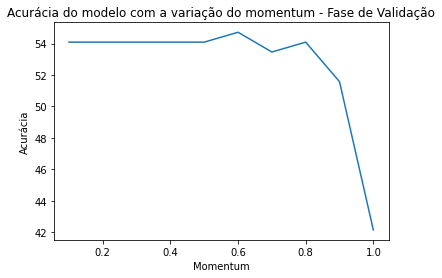

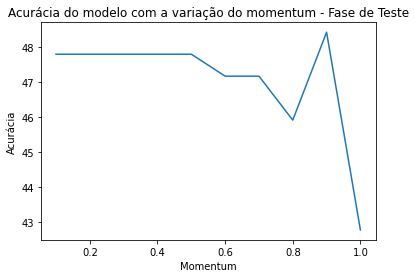

In [12]:
import matplotlib.pyplot as plt

def plot_momentum(step, accuracy_momentum):
  plt.plot(momentum_list, accuracy_momentum)
  plt.title('Acurácia do modelo com a variação do momentum - Fase de {}'.format(step))
  plt.xlabel('Momentum')
  plt.ylabel('Acurácia')
  plt.show()

momentum_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 , 1.0]
range_momentum = range(len(momentum_list))
accuracy_momentum_validation = list(range_momentum)
accuracy_momentum_test = list(range_momentum)
for i in range_momentum:
  clf = create_sgd_mlp(momentum=momentum_list[i])
  clf.fit(input_train, output_train)
  accuracy_momentum_validation[i] = calculate_accuracy(input_validation, output_validation)*100
  accuracy_momentum_test[i] = calculate_accuracy(input_test, output_test)*100

plot_momentum("Validação", accuracy_momentum_validation)
plot_momentum("Teste", accuracy_momentum_test)


## Variando a regulação da MPL - paramêtro alpha

`Alpha` é um parâmetro para o termo de regularização, também conhecido como termo de penalidade, que combate o *overfitting*  restringindo o tamanho dos pesos. O aumento de `alfa` pode corrigir a alta variância (um sinal de *overfitting*), incentivando pesos menores, resultando em um gráfico de limite de decisão que aparece com curvaturas menores. Da mesma forma, diminuir o parâmetro `alfa` pode corrigir um *bias* alto (um sinal de *underfitting*), incentivando pesos maiores, resultando potencialmente em um limite de decisão mais complexo.

***Referência: [https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html)***

Para o problema em questão, percebemos pelos gráficos abaixo que o parâmetro  `alpha` não possui grande interferência na acúrácia do modelo. Entretanto, ao elevarmos muito o valor de `alpha` temos uma pequena e abrupta queda no valor da acurácia. Devido a esse fator, seria melhor manter o valor padrão de `alpha` (0.0001).

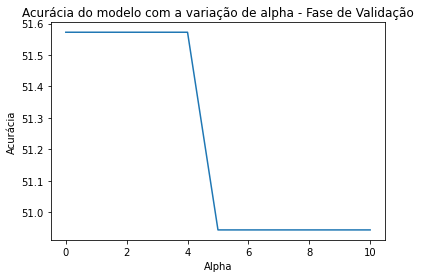

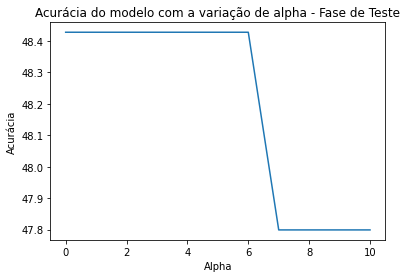

In [13]:
import matplotlib.pyplot as plt

def plot_alpha(step, accuracy_alpha):
  plt.plot(alpha_list, accuracy_alpha)
  plt.title('Acurácia do modelo com a variação de alpha - Fase de {}'.format(step))
  plt.xlabel('Alpha')
  plt.ylabel('Acurácia')
  plt.show()

alpha_list = [0.0, 0.0001, 0.0002, 0.0003, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0 , 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
range_alpha = range(len(alpha_list))
accuracy_alpha_validation = list(range_alpha)
accuracy_alpha_test = list(range_alpha)
for i in range_alpha:
  clf = create_sgd_mlp(alpha=alpha_list[i])
  clf.fit(input_train, output_train)
  accuracy_alpha_validation[i] = calculate_accuracy(input_validation, output_validation)*100
  accuracy_alpha_test[i] = calculate_accuracy(input_test, output_test)*100

plot_alpha("Validação", accuracy_alpha_validation)
plot_alpha("Teste", accuracy_alpha_test)

## Variando a topologia da Rede MLP

A seguir, vamos explorar diferentes topologias de rede para o problema em questão, utilizando os valores padrões de `alpha` e `momentum`.

Topologias aplicadas:


1. (5, 2)
2. (2, 5)
3. (2, 10)
4. (10, 5)
5. (5, 5)

Dentre as topologias testadas, (1) e (5) foram as que apresentaram melhores resultados, conforme gráficos abaixo: 

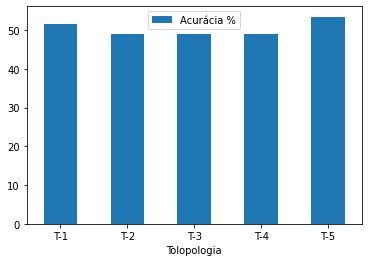

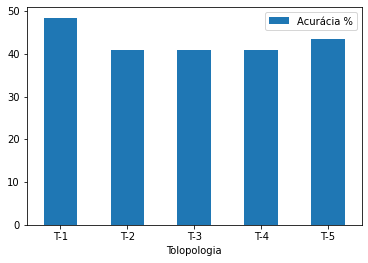

In [14]:
import matplotlib.pyplot as plt

def plot_topol(step, accuracy_topol):
  df = pd.DataFrame({'Tolopologia':['T-1', 'T-2', 'T-3', 'T-4', 'T-5'], 'Acurácia %':accuracy_topol})
  ax = df.plot.bar(x='Tolopologia', y='Acurácia %', rot=0)


topol_list = [(5,2), (2, 5), (2, 10), (10, 2), (5, 5)]
range_topol = range(len(topol_list))
accuracy_topol_validation = list(range_topol)
accuracy_topol_test = list(range_topol)

for i in range_topol:
  clf = create_sgd_mlp(hidden_layer_sizes=topol_list[i])
  clf.fit(input_train, output_train)
  accuracy_topol_validation[i] = calculate_accuracy(input_validation, output_validation)*100
  accuracy_topol_test[i] = calculate_accuracy(input_test, output_test)*100

plot_topol("Validação", accuracy_topol_validation)
plot_topol("Teste", accuracy_topol_test)